# PCA based Noise Reduction to compare with Autoencoder Architecture

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
#loading mnist dataset
from sklearn.datasets import load_digits
plt.rcParams['figure.figsize'] = [40, 20]
(X_train, y_train), (X_test, y_test)=datasets.mnist.load_data()

In [3]:
print(X_test.shape)

(10000, 28, 28)


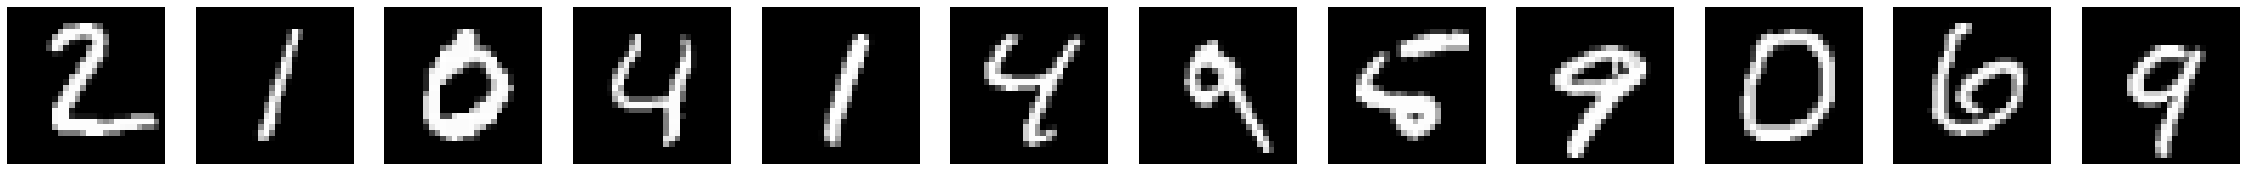

In [4]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test[i], cmap='gray')
plt.show()

### Preprocessing and Noise Introduction

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255.
noise_ratio = 0.5
X_train_noisy = X_train + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_noisy = X_test + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

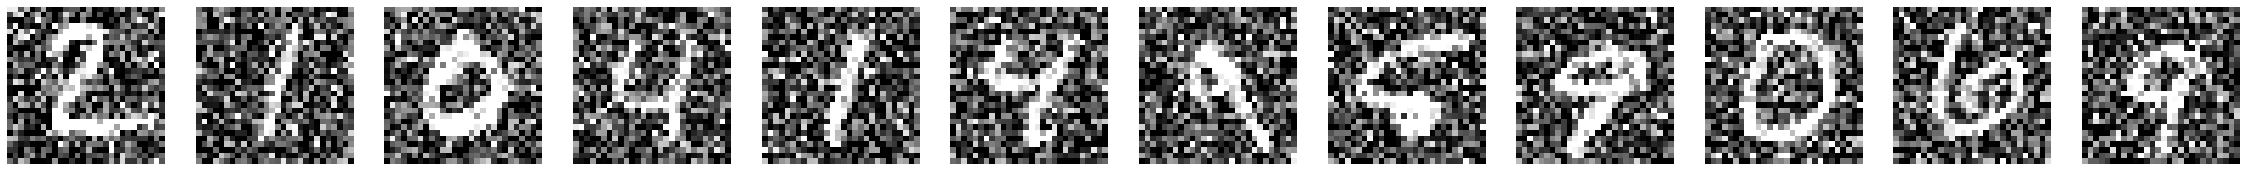

In [6]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()

## Handmade PCA Decomposition Algorithm

In [7]:
def pca_fnctn(pca_init_data,d):  # data is nxp
    """
    This is function which takes in a matrix pca_init_data which is the noisy data. d is the 
    dimension to which we reduce. This function returns a list containing the transformation 
    matrix, the reduced dimension output,the denoised image output and the variance factor
    """
    trans_mat=[]
    mean=pca_init_data.mean(0)
    a=np.matrix(np.ones((len(pca_init_data),1)))
    #taking the mean subtracted to find the covariance matrix
    mean_zero=pca_init_data-np.matmul(a,mean) #nxp
    #finding the covariance matrix
    cov_mat=np.matmul(np.transpose(mean_zero),mean_zero)      #pxp
    #finding the eigenvalues and eigenvectors
    w, v = np.linalg.eig(cov_mat)       # w--> 1xp, v-->pxp columns have evectors
    v=np.array(np.transpose(v))
    #sorting the the eigenvalues 
    w_sort=np.sort(w)
    #taking the top n most significant eigenvectors corresponding to the sorted eigenvalues
    for k in range(0,d):
        for q in range(0,len(np.transpose(w))):
            if(w_sort[-k-1]==w[q]):
                trans_mat.append(v[q])
                break
    #transformation matrix
    trans_mat=np.transpose(np.matrix(trans_mat)) # pxd
    #reduced dimension matrix
    dimRed_data=np.matmul(mean_zero,trans_mat) # nxd
    #new_data will have the inverse transform or the denoised image
    new_data=np.matmul(dimRed_data,np.transpose(trans_mat))+ np.matmul(a,pca_init_data.mean(0)) # nxp
    #to find the new covariance matrix
    new_mean_zero=pca_init_data-np.matmul(a,new_data.mean(0))
    #new covariance matrix
    new_cov=np.matmul(np.transpose(new_mean_zero),new_mean_zero)
    #variance_factor
    var_fact=np.trace(new_cov)/np.trace(cov_mat)
    return [trans_mat, dimRed_data, new_data, var_fact]


In [8]:
def our_pca_denoise(n):
    """This function plots the output for a given reduced dimension input n. It calls the
    pca_fnctn() to perform PCA"""
    a=pca_fnctn(np.matrix(X_test_noisy.reshape(10000,784)),n)
    new_data=np.array(a[2])
    proc=new_data.reshape(10000,28,28)
    # Plot 12 Examples 
    print(f"For N = {n}")
    plt.figure()
    for i in range(1,13):
        plt.subplot(1,12,i)
        plt.axis('off')
        plt.imshow(proc[i], cmap='gray')
    plt.show()

### We plot few of the outputs for 
- $\verb|no of components = 10, 20, 30... 780|$

Then we visually try to identify where the noise is minimized.

For N = 10


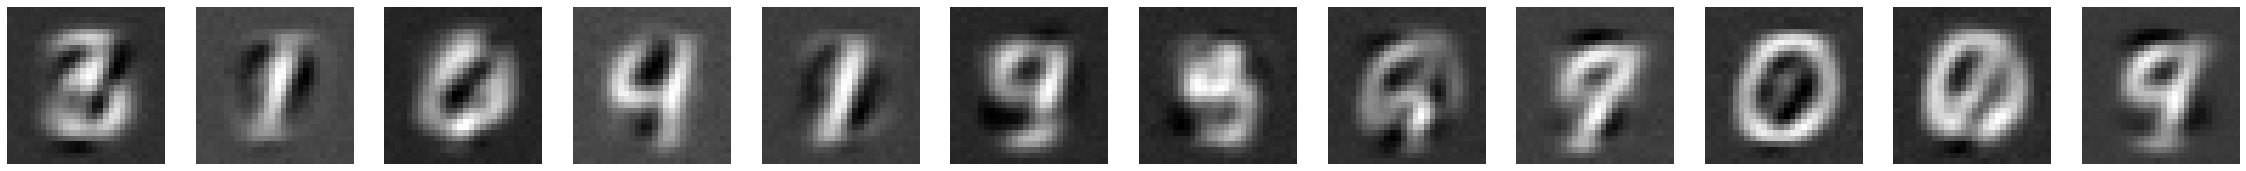

For N = 20


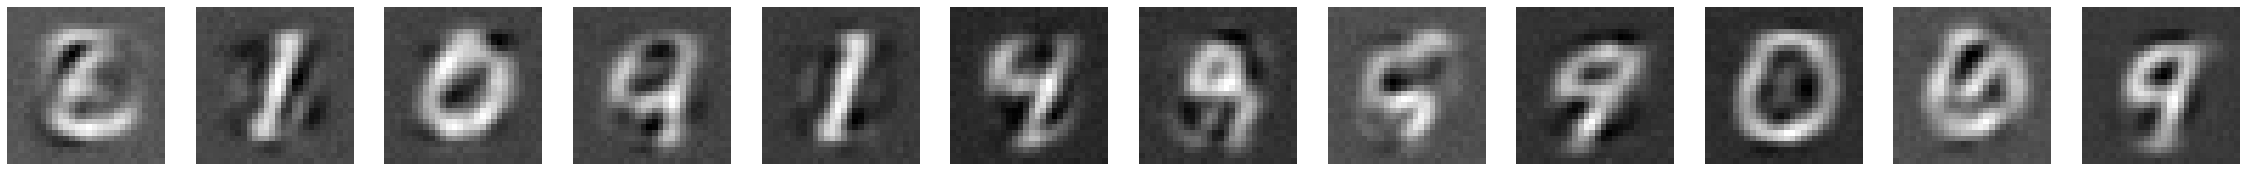

For N = 30


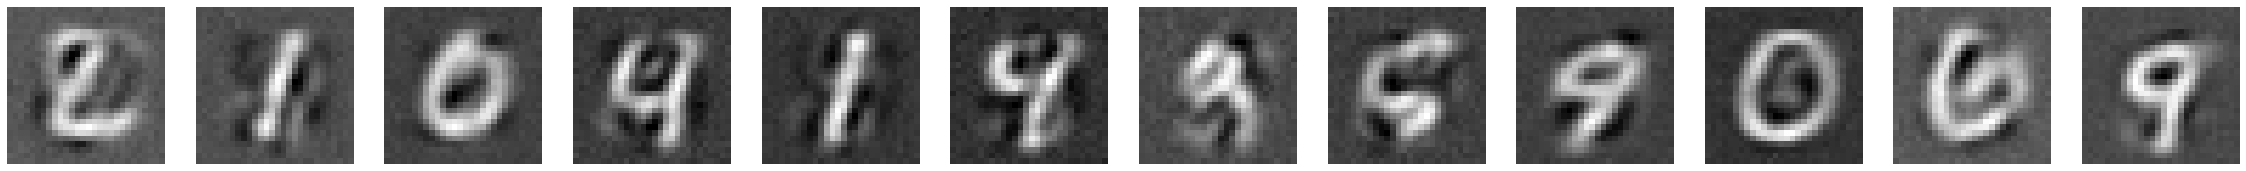

For N = 40


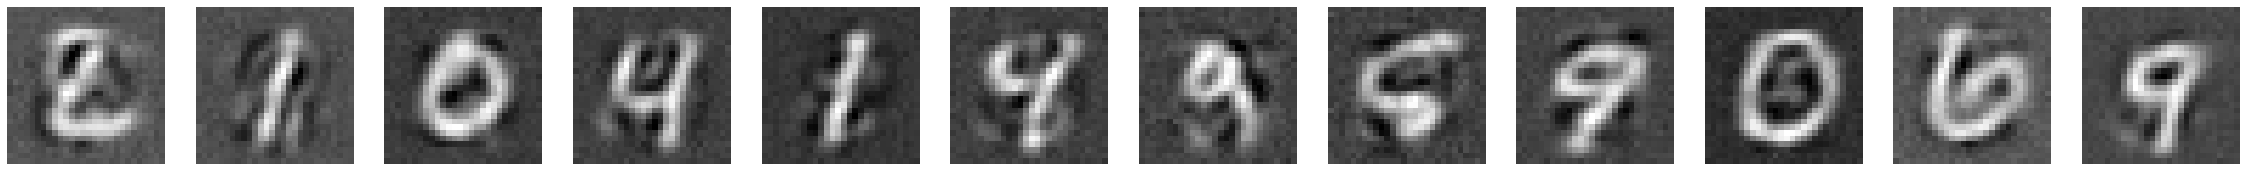

For N = 50


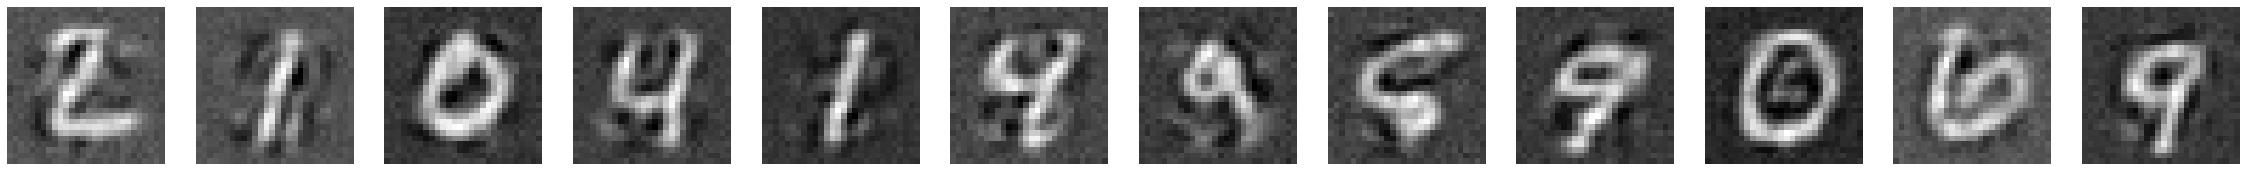

For N = 60


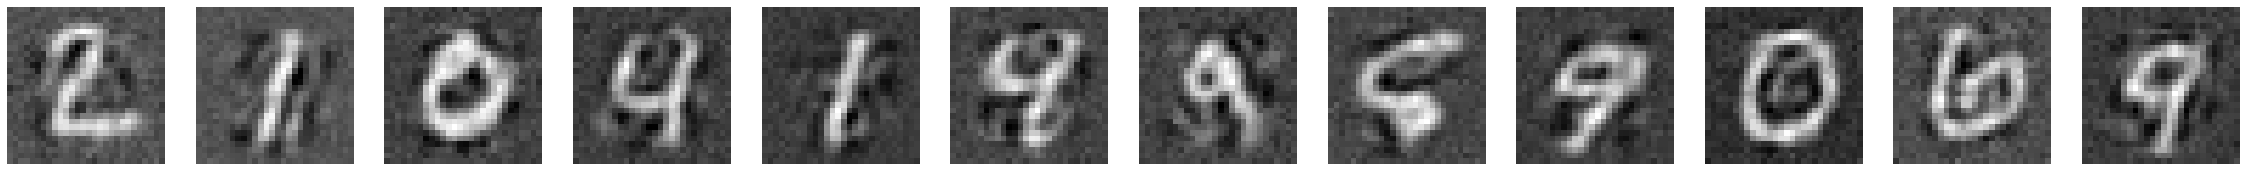

For N = 70


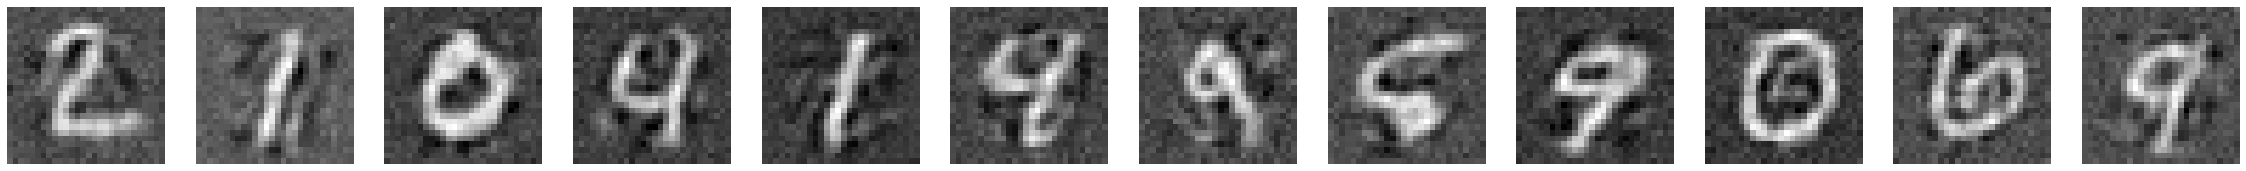

For N = 80


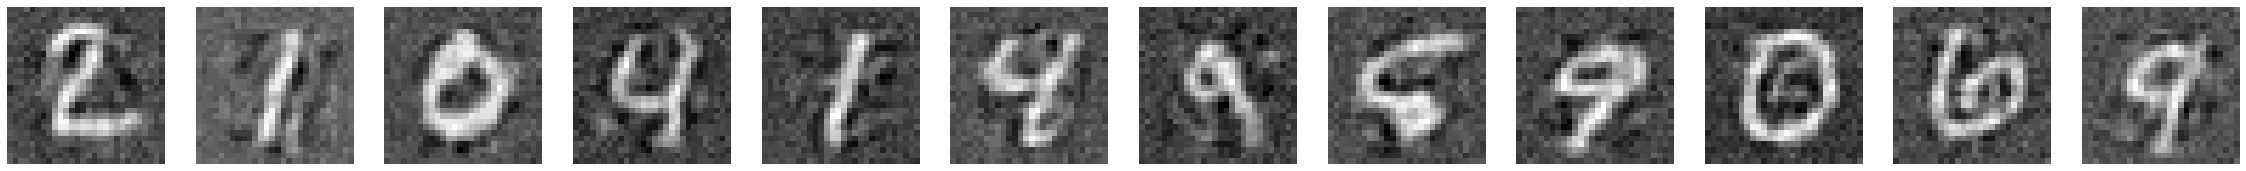

For N = 90


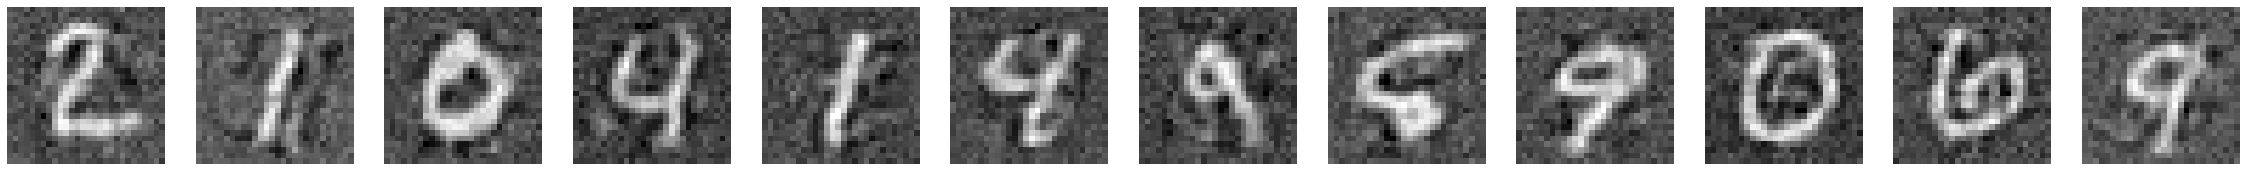

For N = 100


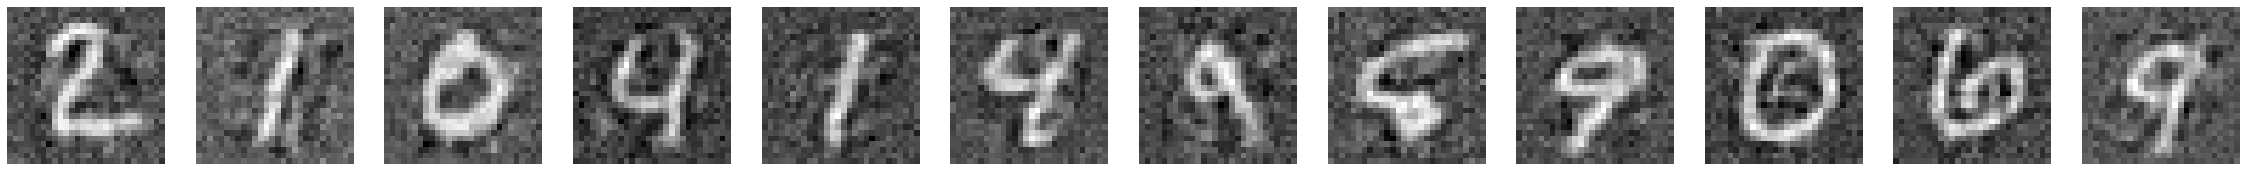

For N = 110


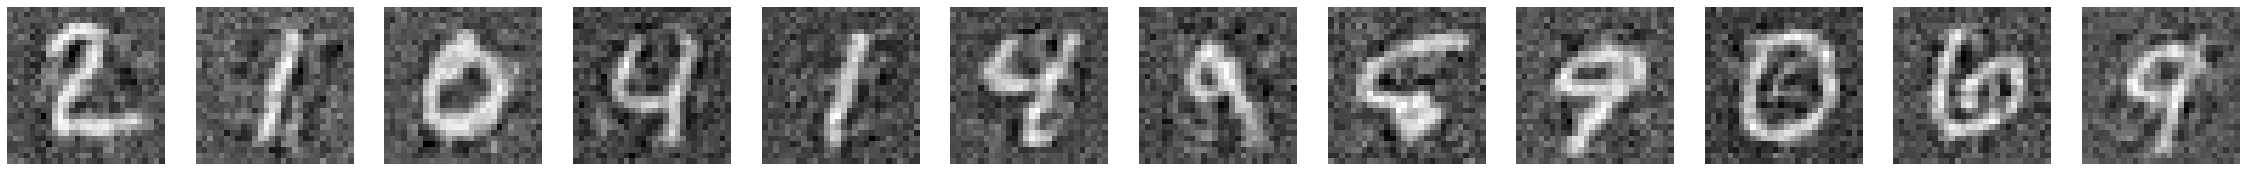

For N = 120


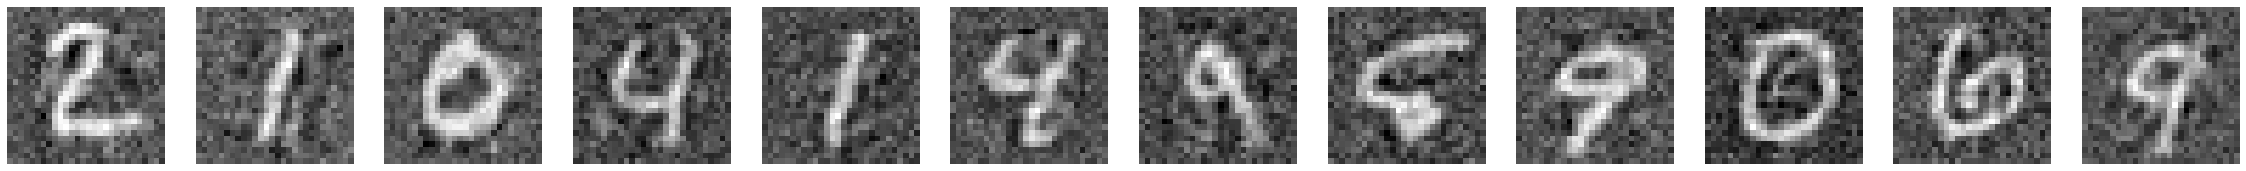

For N = 130


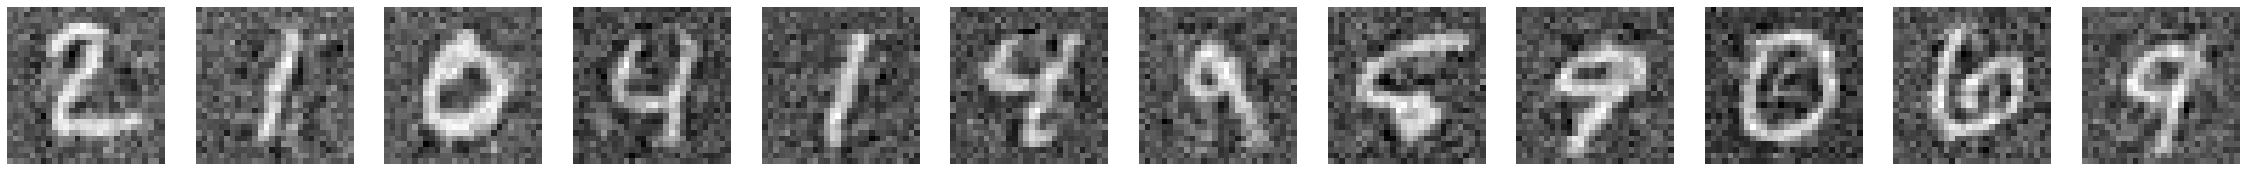

For N = 140


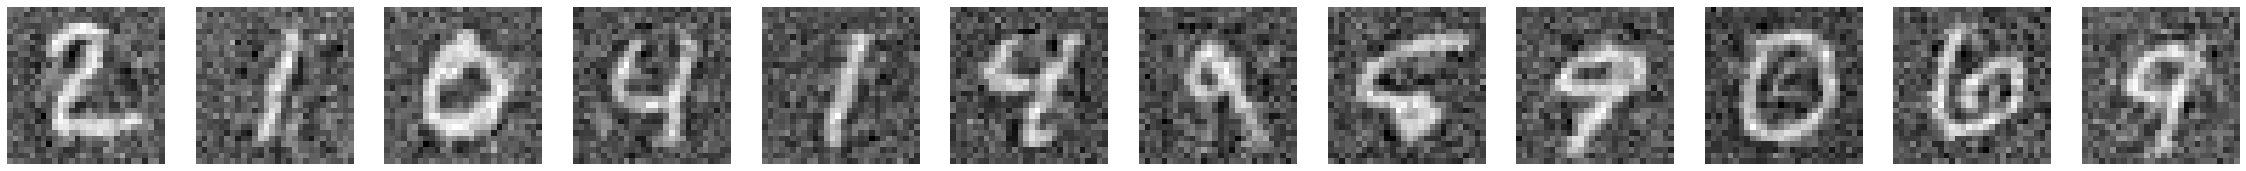

For N = 150


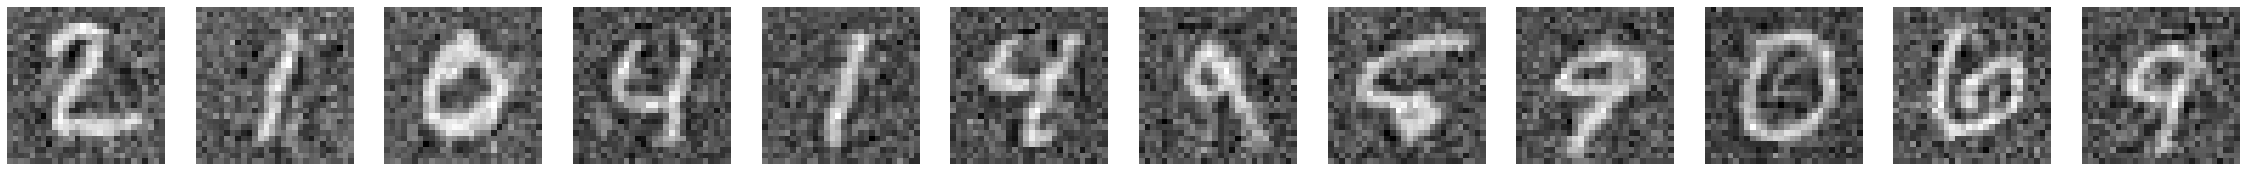

For N = 160


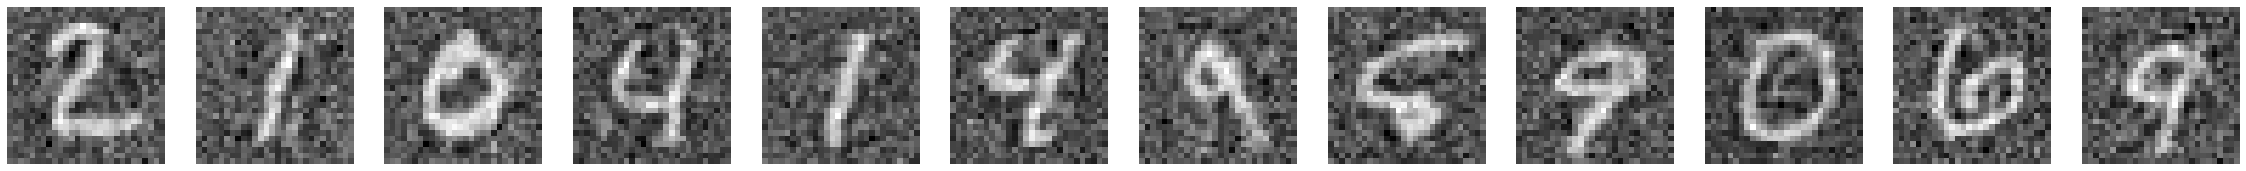

For N = 170


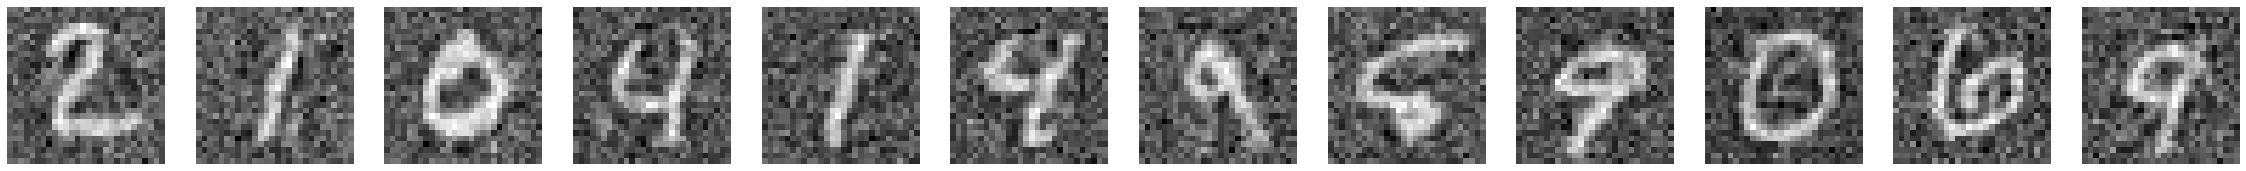

For N = 180


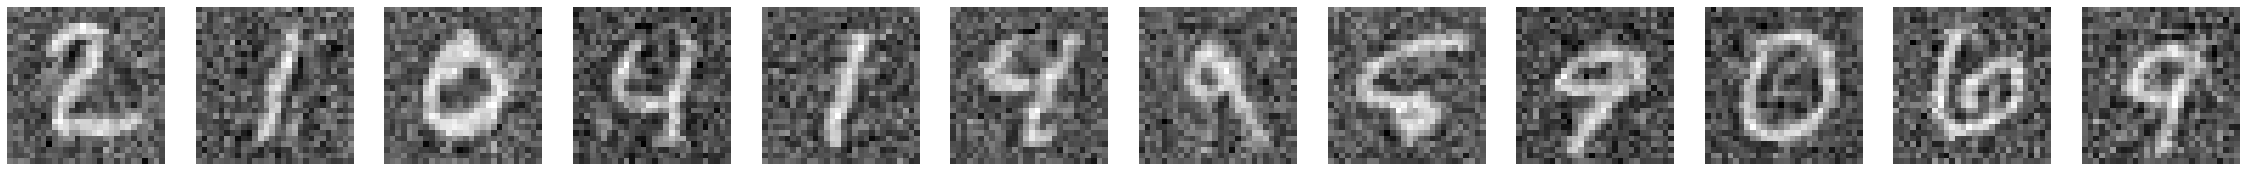

For N = 190


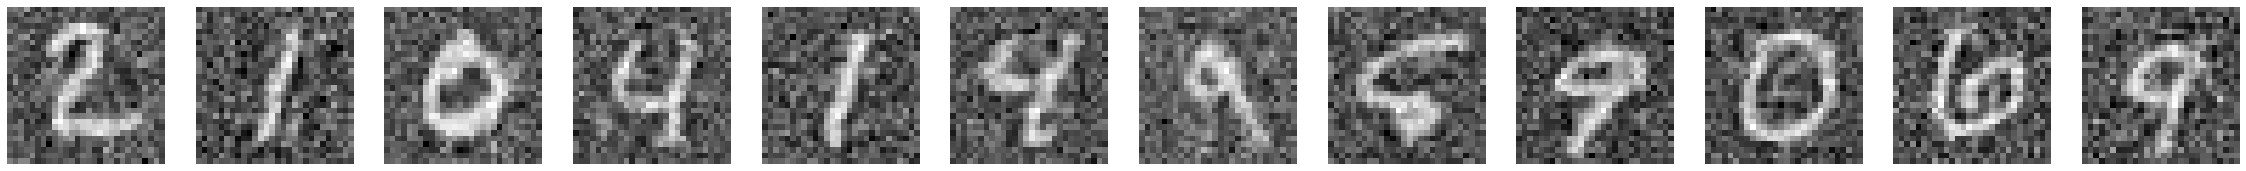

In [9]:
for i in range(10,200,10):
    our_pca_denoise(i)

### Inference

We notice that for a value of N = 80 the noise is minimized. But we notice that this isnt as effective as the Autoencoder based Noise Reduction Techniques

### Noisy 

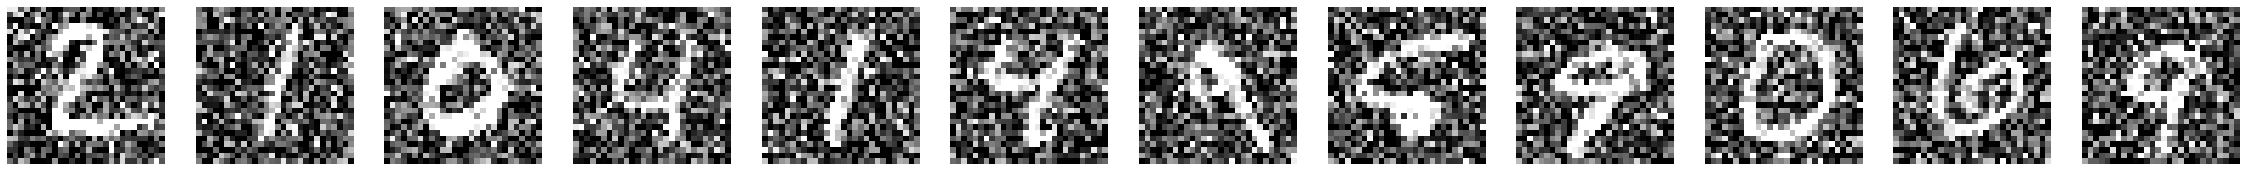

In [10]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()

### Denoised

For N = 80


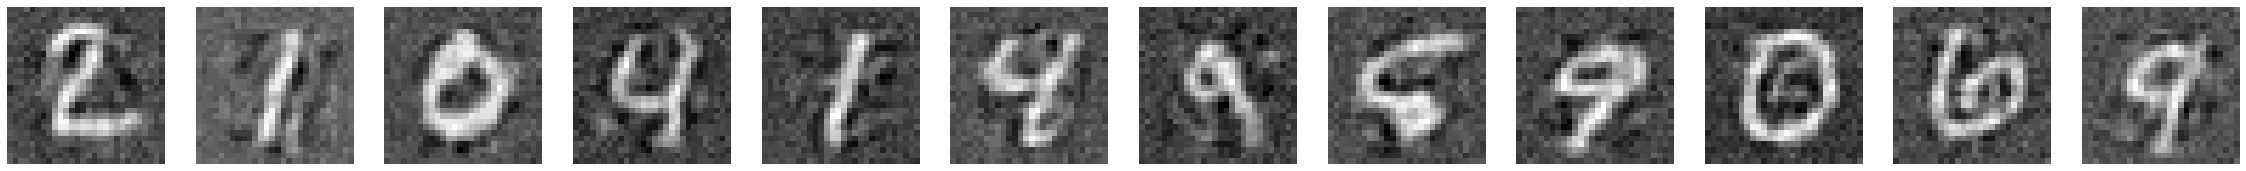

In [11]:
our_pca_denoise(80)

# Comparing with Scikit-Learn PCA

In [12]:
def using_lib(n):
    """This function takes the input n which is the dimensions to which the components is reduced. It makes use
    of PCA() from scikit-learn library to contrast the performance."""
    from sklearn.decomposition import PCA
    pca = PCA(n_components = n)
    pca.fit(X_test_noisy)
    components = pca.transform(X_test_noisy)
    fixed = pca.inverse_transform(components).reshape(10000,28,28)

    # Plot 12 Examples 
    print(f"For N = {n}")
    plt.figure()
    for i in range(1,13):
        plt.subplot(1,12,i)
        plt.axis('off')
        plt.imshow(fixed[i], cmap='gray')
    plt.show()

For N = 80


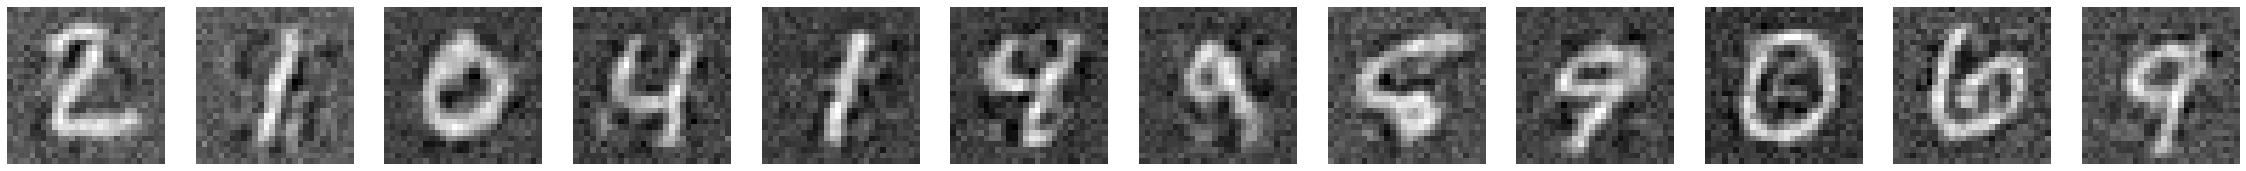

In [13]:
using_lib(80)

Thus our hand implemented PCA, fares comparable performance with Scikit-Learn